# Here we are going to apply Linear regression with Python and for this we use Data set of USA House Pricing Data set.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Data Load

In [2]:
# here we load our excel data into pandas dataframe 
usa_df = pd.read_csv("USA_Housing.csv")
usa_df[10:20]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
10,80527.472083,8.093513,5.042747,4.10,47224.359840,1.707046e+06,"6368 John Motorway Suite 700\nJanetbury, NM 26854"
11,50593.695497,4.496513,7.467627,4.49,34343.991886,6.637324e+05,"911 Castillo Park Apt. 717\nDavisborough, PW 7..."
12,39033.809237,7.671755,7.250029,3.10,39220.361467,1.042814e+06,"209 Natasha Stream Suite 961\nHuffmanland, NE ..."
13,73163.663441,6.919535,5.993188,2.27,32326.123139,1.291332e+06,"829 Welch Track Apt. 992\nNorth John, AR 26532..."
14,69391.380184,5.344776,8.406418,4.37,35521.294033,1.402818e+06,"PSC 5330, Box 4420\nAPO AP 08302"
15,73091.866746,5.443156,8.517513,4.01,23929.524053,1.306675e+06,"2278 Shannon View\nNorth Carriemouth, NM 84617"
16,79706.963058,5.067890,8.219771,3.12,39717.813576,1.556787e+06,"064 Hayley Unions\nNicholsborough, HI 44161-1887"
17,61929.077018,4.788550,5.097010,4.30,24595.901498,5.284852e+05,"5498 Rachel Locks\nNew Gregoryshire, PW 54755"
18,63508.194299,5.947165,7.187774,5.12,35719.653052,1.019426e+06,Unit 7424 Box 2786\nDPO AE 71255
19,62085.276403,5.739411,7.091808,5.49,44922.106702,1.030591e+06,"19696 Benjamin Cape\nStephentown, ME 36952-4733"


# Data Discription

In [3]:
usa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
usa_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
usa_df.isnull().count()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms    5000
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [6]:
usa_df.memory_usage()

Index                             128
Avg. Area Income                40000
Avg. Area House Age             40000
Avg. Area Number of Rooms       40000
Avg. Area Number of Bedrooms    40000
Area Population                 40000
Price                           40000
Address                         40000
dtype: int64

In [7]:
usa_df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## Data Visualization

In [8]:
# Ploting pairplot
# uncomment for visualization
# sns.pairplot(usa_df) 

In [9]:
# via distribution we can say it follow normal distribution
# uncomment for visualization

#sns.displot(usa_df['Price'],kde = True,bins =20)

In [10]:
# heatmap - use for show correlation between data
# uncomment for visualization

#sns.heatmap(usa_df.corr(),cmap='magma',linecolor='black',linewidths=2, annot=True)

## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
usa_df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [13]:
X = usa_df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [14]:
y = usa_df['Price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
# here random state for data how we select the data randomly that is only a number and on the basis of this number data is going to split

In [16]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()


In [17]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [18]:
linear_regression.intercept_

-2640159.7968526958

In [19]:
linear_regression.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [20]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [21]:
cfifct_df = pd.DataFrame(linear_regression.coef_,X.columns,columns=['Coeff'])
cfifct_df

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


## Prediction
1. So Now we do prediction on the X_test because in X_test we have independent variable and after       applying predict function on data we will compare X_test to y_test because y_test contain acctual    answer for predict(X_test).

2. After predict X_test and compare with y_test we will subtract the y_test to X_test and find the      diffrence between actual and predicted. 

In [22]:
# prediction on X_test
prediction = linear_regression.predict(X_test)
prediction

array([1260960.70567627,  827588.75560329, 1742421.24254344, ...,
        372191.40626917, 1365217.15140898, 1914519.5417888 ])

In [23]:
# Comparing X_test to y_test
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

In [24]:
Compare_data = prediction - y_test
Compare_data

1718      9272.089973
2511    -45459.564039
345      45443.579711
2521    -89338.900475
54       49929.566310
            ...      
1776     25522.673381
4269    -31721.824350
1661    220664.323643
2410     21392.936265
2302      8494.905304
Name: Price, Length: 2000, dtype: float64

In [25]:
Compare_DF = pd.DataFrame(prediction,columns=['X_test'])
Compare_DF

,X_test
0,1.260961e+06
1,8.275888e+05
2,1.742421e+06
3,9.746254e+05
4,9.987178e+05
...,...
1995,1.515043e+06
1996,7.460118e+05
1997,3.721914e+05
1998,1.365217e+06


In [26]:
Compare_DF['y_test'] = y_test
Compare_DF['Compare'] = Compare_data
Compare_DF

,X_test,y_test,Compare
0,1.260961e+06,1.059034e+06,166908.080956
1,8.275888e+05,NaN,NaN
2,1.742421e+06,NaN,NaN
3,9.746254e+05,NaN,NaN
4,9.987178e+05,6.309435e+05,219333.484020
...,...,...,...
1995,1.515043e+06,7.284020e+05,99956.635449
1996,7.460118e+05,1.381483e+06,-109283.194317
1997,3.721914e+05,1.424994e+06,-11918.988227
1998,1.365217e+06,1.741106e+06,-16963.822471


<IPython.core.display.Javascript object>

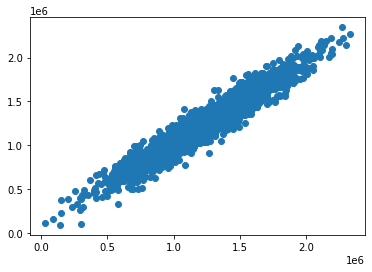

In [27]:
plt.scatter(y_test,prediction)

/home/nikhil/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

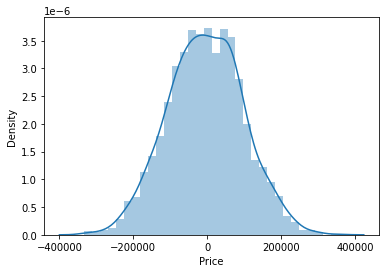

In [28]:
# here we are ploting distplot for residual
# residual - A residual is a deviation from the sample mean. Errors, like other population parameters (e.g. a population mean), are usually theoretical. Residuals, like other sample statistics (e.g. a sample mean), are measured values from a sample
sns.distplot((y_test-prediction))
# here if residual follow Normal Distribution then this model is a correct choice for Data. 

## Regression Evalution Matrix are of 3type
1. Mean Absolute Error(MAE)  =   Actual - Predicted  = result
2. Mean Squared Error(MSE)   =   result ** 2
3. Root meanSquared Error(RMSE)  = root of Mean Squared Error

For create the best Model we have to mimimize this Error Because as much as this error is less you got best prediction and a best fitted line for data point. 

In [29]:
# find out MAE & MSE & RMSE
from sklearn import metrics

In [30]:
# MAE
mean_absolute_error = metrics.mean_absolute_error(y_test,prediction)
# MSE
mean_square_error = metrics.mean_squared_error(y_test,prediction)
# RMSE
root_mean_square_error = np.sqrt(metrics.mean_squared_error(y_test,prediction))
print([mean_absolute_error,mean_square_error,root_mean_square_error])

[82288.22251914942, 10460958907.20898, 102278.82922290899]


So now we can predict the house price of USA on the basis of there Features

In [33]:
print('Train Score: ', linear_regression.score(X_train, y_train))  
print('Test Score: ', linear_regression.score(X_test, y_test))  

Train Score:  0.9181223200568411
Test Score:  0.9176824009649241
